In [16]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from subject_object_extraction import findSVOs
import nltk
nltk.download('punkt')
import sys
import pandas as pd
import tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
!{sys.executable} -m spacy download en_core_web_lg
nltk.download('vader_lexicon')
nlp = spacy.load('en_core_web_lg')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hajhavar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hajhavar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
def load_text(file_name):
    with open(file_name, 'r') as file:
        text = file.read()
    sentences = sent_tokenize(text)
    return sentences


In [3]:
#Function to create the graph and define the entities
def create_graph(final_nodes):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = final_nodes[i][0]
        ent2 = final_nodes[i][2]
        rel = final_nodes[i][1]
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    if(len(edge) == 0 or len(final_nodes) == 0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i], target[i], i)])
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize = (size, size))
        edge_labels = dict([((u, v, ), edge[d['weight']]) for u, v, d in G.edges(data = True)])
        pos = nx.spring_layout(G, k = 0.8)
        nx.draw(G, with_labels = True, node_color = 'lightblue', node_size=5000, edge_color='r', edge_cmap = plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 15)
        return G, edge_labels


In [4]:
def get_subsystem_kg(subsystem_name, final_nodes):
    interested_nodes = []
    for i in (range(0,len(final_nodes))):
        ent1 = final_nodes[i][0]
        ent2 = final_nodes[i][2]
        rel = final_nodes[i][1]
        if (ent1 == subsystem_name) or (ent2 == subsystem_name) or (rel == subsystem_name):
            interested_nodes.append(final_nodes[i])
    print(interested_nodes)
    g = create_graph(interested_nodes)
    return g

[('i', 'force', 'shutdown'), ('shutdown', 'took', 'minutes'), ('shutdown', 'start', 'it'), ('logoff', 'shutdown', 'device'), ('i', 'shutdown', 'pc'), ('that', 'cause', 'shutdown'), ('i', 'force', 'shutdown'), ('shutdown', 'restart', 'button'), ('there', 'shutdown', 'wifi'), ('win+x', 'choose', 'shutdown'), ('i', 'do', 'shutdown'), ('nothing', 'responds', 'shutdown'), ('outlook', 'prevents', 'shutdown'), ('outlook', 'blocks', 'shutdown'), ('i', 'cancel', 'shutdown'), ('screen', 'shutdown', 'showing'), ('machine', 'shutdown', 'result'), ('machine', 'initiates', 'shutdown')]


(<networkx.classes.digraph.DiGraph at 0x2d287cadb80>,
 {('i', 'shutdown'): 'cancel',
  ('i', 'pc'): 'shutdown',
  ('shutdown', 'minutes'): 'took',
  ('shutdown', 'it'): 'start',
  ('shutdown', 'button'): 'restart',
  ('logoff', 'device'): 'shutdown',
  ('that', 'shutdown'): 'cause',
  ('there', 'wifi'): 'shutdown',
  ('win+x', 'shutdown'): 'choose',
  ('nothing', 'shutdown'): 'responds',
  ('outlook', 'shutdown'): 'blocks',
  ('screen', 'showing'): 'shutdown',
  ('machine', 'result'): 'shutdown',
  ('machine', 'shutdown'): 'initiates'})

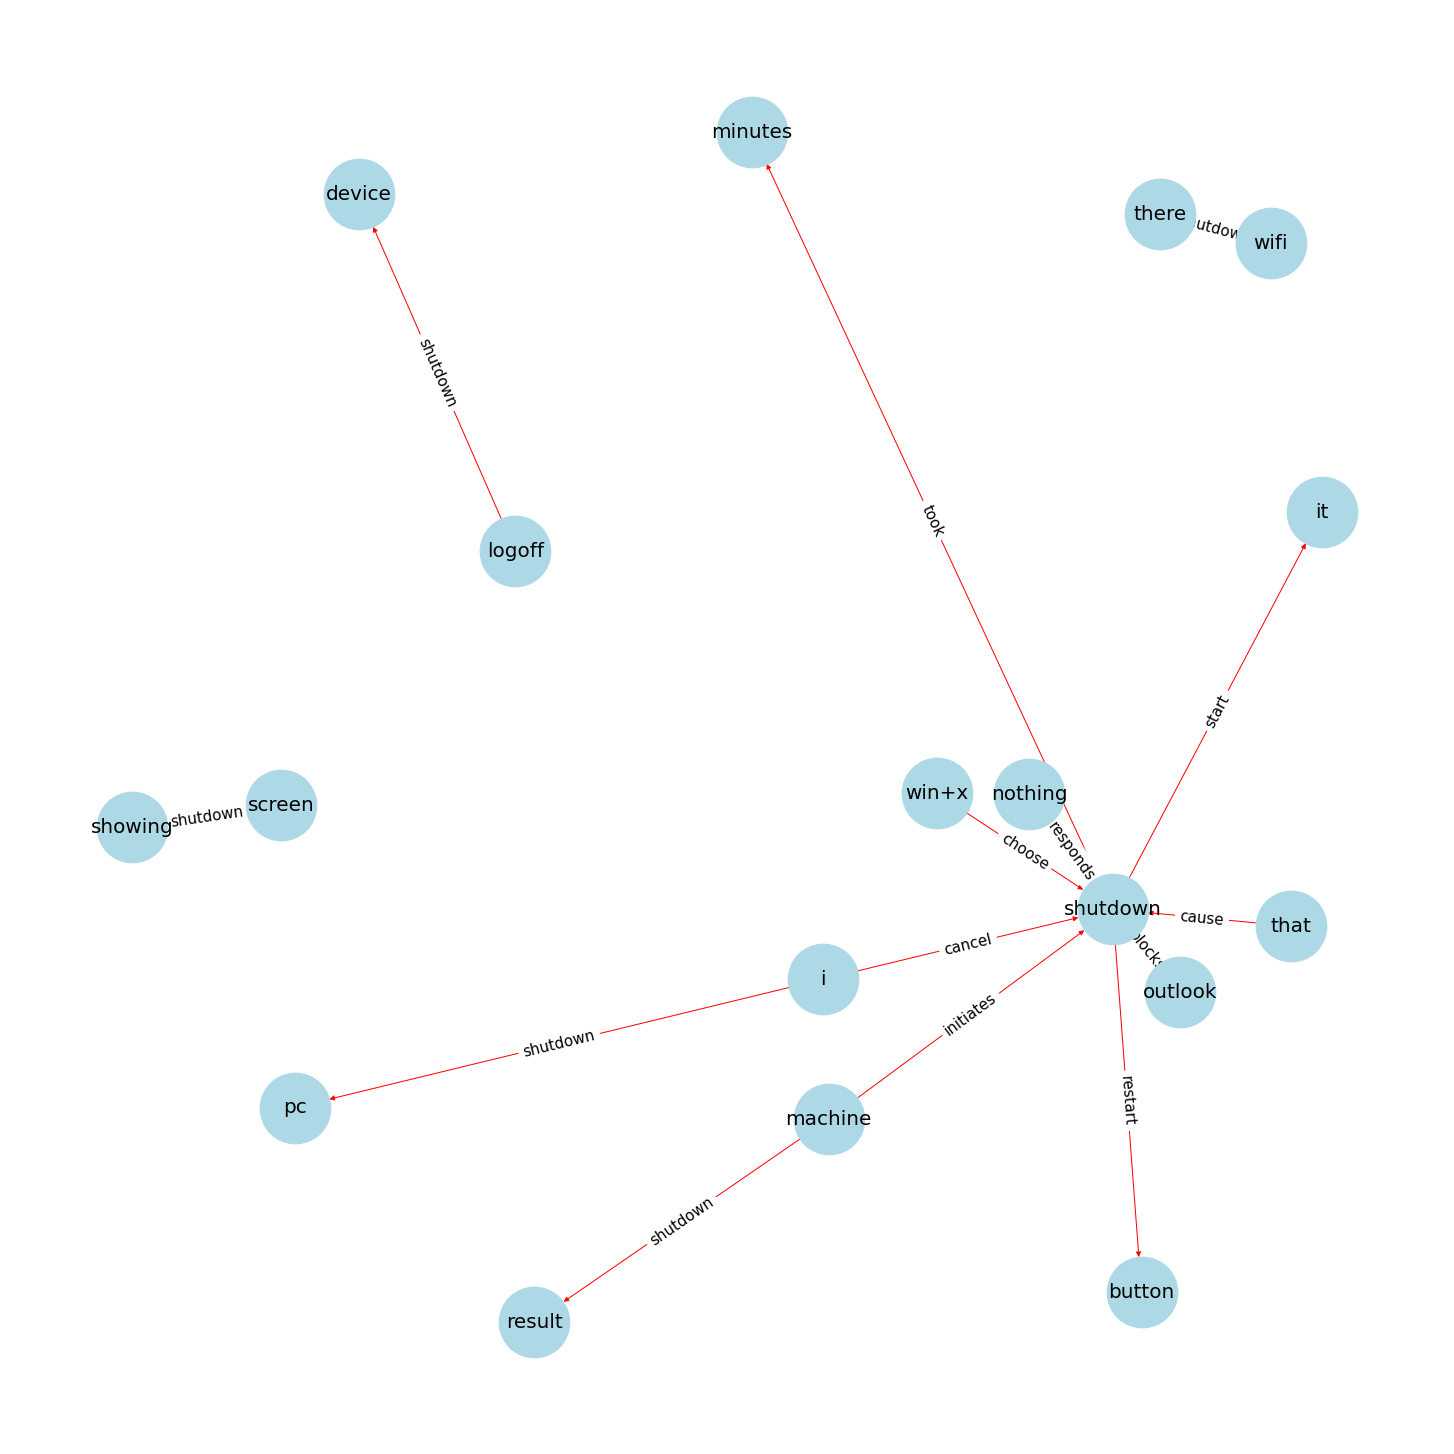

In [5]:
file_name = 'fulldataUIF'
sentences = load_text('data/' + file_name + '.csv')

nodes = []
final_nodes = []
for sentence in sentences:
    tokens = nlp(sentence)
    svos = findSVOs(tokens)
    nodes.append(svos)

for i in nodes:
    for j in i:
        if (len(j) == 3):
            final_nodes.append(j)

#g = create_graph(final_nodes)
#plt.savefig('images/' + file_name + '-graph.png')
get_subsystem_kg ('shutdown', final_nodes)

[('sound', 'touch', 'animation'), ('sound', '!says', 'device'), ('i', 'have', 'sound'), ('there', '!is', 'sound'), ('i', '!have', 'sound'), ('computer', '!play', 'sound'), ('laptop', 'made', 'sound'), ('there', '!is', 'sound'), ('usb', 'reconnect', 'sound'), ('i', 'turn', 'sound'), ('sound', '!work', 'words'), ('sound', '!find', 'driver'), ('timer', '!produce', 'sound'), ('there', '!is', 'sound'), ('speakers', '!have', 'sound'), ('i', '!have', 'sound'), ('service', '!responding', 'sound'), ('speaker', '!has', 'sound'), ('there', '!is', 'sound'), ('i', '!listen', 'sound'), ('there', '!is', 'sound'), ('sound', 'watching', 'movie'), ('there', '!is', 'sound'), ('there', '!is', 'sound'), ('there', '!is', 'sound'), ('headphones', '!is', 'sound'), ('there', '!is', 'sound'), ('there', '!is', 'sound'), ('there', '!is', 'sound'), ('you', 'maximize', 'sound'), ('software', 'has', 'sound'), ('computer', 'making', 'sound'), ('there', '!was', 'sound'), ('there', 'is', 'sound'), ('player', '!has', 's

(<networkx.classes.digraph.DiGraph at 0x2d2b5c1f1c0>,
 {('sound', 'animation'): 'touch',
  ('sound', 'device'): '!says',
  ('sound', 'words'): '!work',
  ('sound', 'driver'): '!find',
  ('sound', 'movie'): 'watching',
  ('sound', 'sound'): '!has',
  ('sound', '|'): 'plays',
  ('sound', 'broken'): 'seems',
  ('sound', 'you'): 'fix',
  ('sound', 'defect'): 'fix',
  ('sound', 'lot'): 'running',
  ('sound', 'headphones'): 'recognizes',
  ('sound', 'itself'): 'turns',
  ('sound', 'solution'): 'recommended',
  ('sound', 'me'): '!working',
  ('sound', 'surface'): 'using',
  ('sound', 'insert'): '!use',
  ('sound', 'problems'): 'has',
  ('sound', 'keyboard'): 'closing',
  ('sound', 'error'): 'shows',
  ('sound', 'code'): '!work',
  ('device', 'sound'): '!has',
  ('i', 'sound'): '!hear',
  ('there', 'sound'): '!is',
  ('computer', 'sound'): '!has',
  ('laptop', 'sound'): 'made',
  ('usb', 'sound'): 'reconnect',
  ('timer', 'sound'): '!produce',
  ('speakers', 'sound'): 'give',
  ('service', 'so

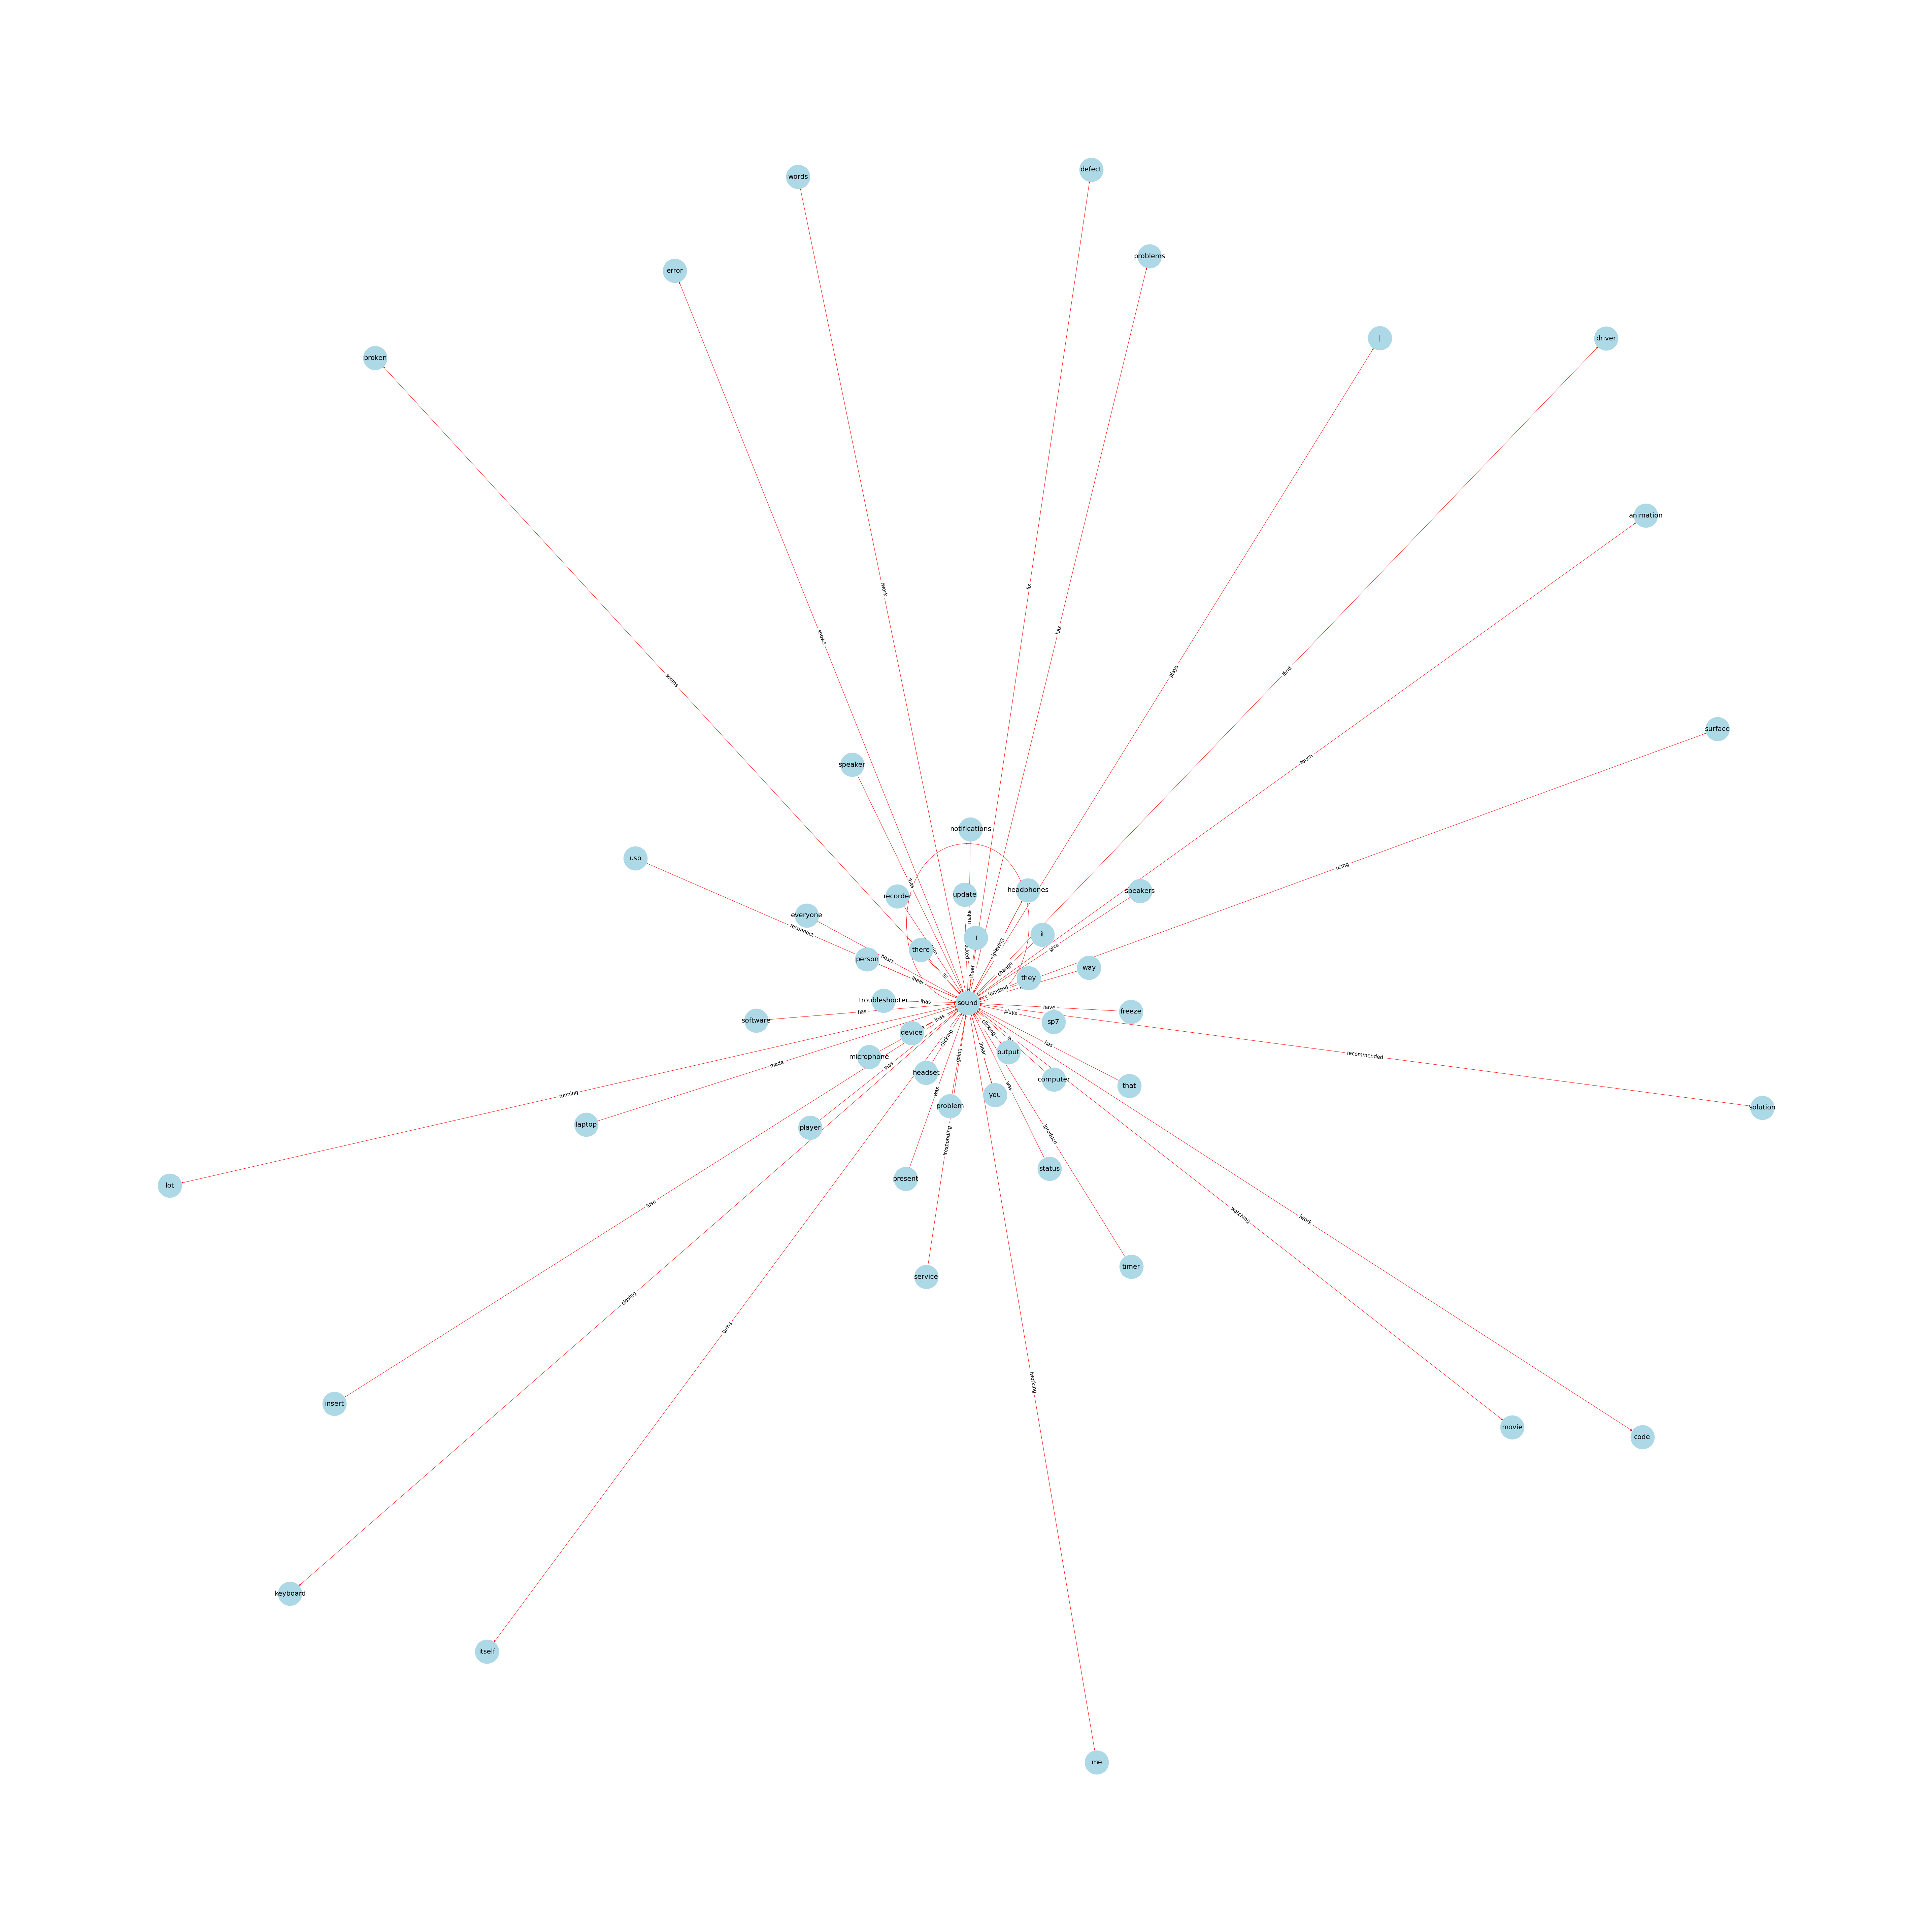

In [17]:
get_subsystem_kg ('sound', final_nodes)

[('printer', '!plugged', 'bluetooth'), ('i', 'turn', 'bluetooth'), ('device', '!have', 'bluetooth'), ('t', 'enable', 'bluetooth'), ('i', '!work', 'bluetooth'), ('device', '!have', 'bluetooth'), ('device', '!have', 'bluetooth'), ('network', 'check', 'bluetooth'), ('device', 'showing', 'bluetooth'), ('bluetooth', '!connect', 'mouse'), ('computer', '!have', 'bluetooth'), ('capability', 'use', 'bluetooth'), ('i', '!have', 'bluetooth'), ('i', '!have', 'bluetooth'), ('way', 'turn', 'bluetooth'), ('i', '!access', 'bluetooth'), ('bluetooth', '!detect', 'devices'), ('bluetooth', '!connect', 'center'), ('working', '!turn', 'bluetooth'), ('i', '!turn', 'bluetooth'), ('bluetooth', 'does', 'nothing'), ('way', 'turn', 'bluetooth'), ('there', '!is', 'bluetooth'), ('device', 'have', 'bluetooth'), ('computer', 'have', 'bluetooth'), ('computer', '!have', 'bluetooth'), ('computer', '!have', 'bluetooth'), ('bluetooth', '!entering', 'suspend'), ('bluetooth', '!entering', 'suspend'), ('i', 'disable', 'bluet

(<networkx.classes.digraph.DiGraph at 0x2d2f2d4a7f0>,
 {('printer', 'bluetooth'): '!work',
  ('bluetooth', 'mouse'): '!connect',
  ('bluetooth', 'devices'): '!detect',
  ('bluetooth', 'center'): '!connect',
  ('bluetooth', 'nothing'): 'does',
  ('bluetooth', 'suspend'): '!entering',
  ('bluetooth', 'airpods'): '!find',
  ('i', 'bluetooth'): 'corrected',
  ('device', 'bluetooth'): 'have',
  ('t', 'bluetooth'): 'enable',
  ('network', 'bluetooth'): 'check',
  ('computer', 'bluetooth'): '!have',
  ('capability', 'bluetooth'): 'use',
  ('way', 'bluetooth'): 'turn',
  ('working', 'bluetooth'): '!turn',
  ('there', 'bluetooth'): '!is',
  ('headset', 'bluetooth'): '!play',
  ('recording', 'bluetooth'): 'toggling',
  ('me', 'bluetooth'): 'turn',
  ('surface', 'bluetooth'): 'lost',
  ('troubleshooter', 'bluetooth'): 'turns',
  ('using', 'bluetooth'): 'restored',
  ('it', 'bluetooth'): '!has',
  ('error', 'bluetooth'): 'connecting',
  ('kb501270', 'bluetooth'): '!use'})

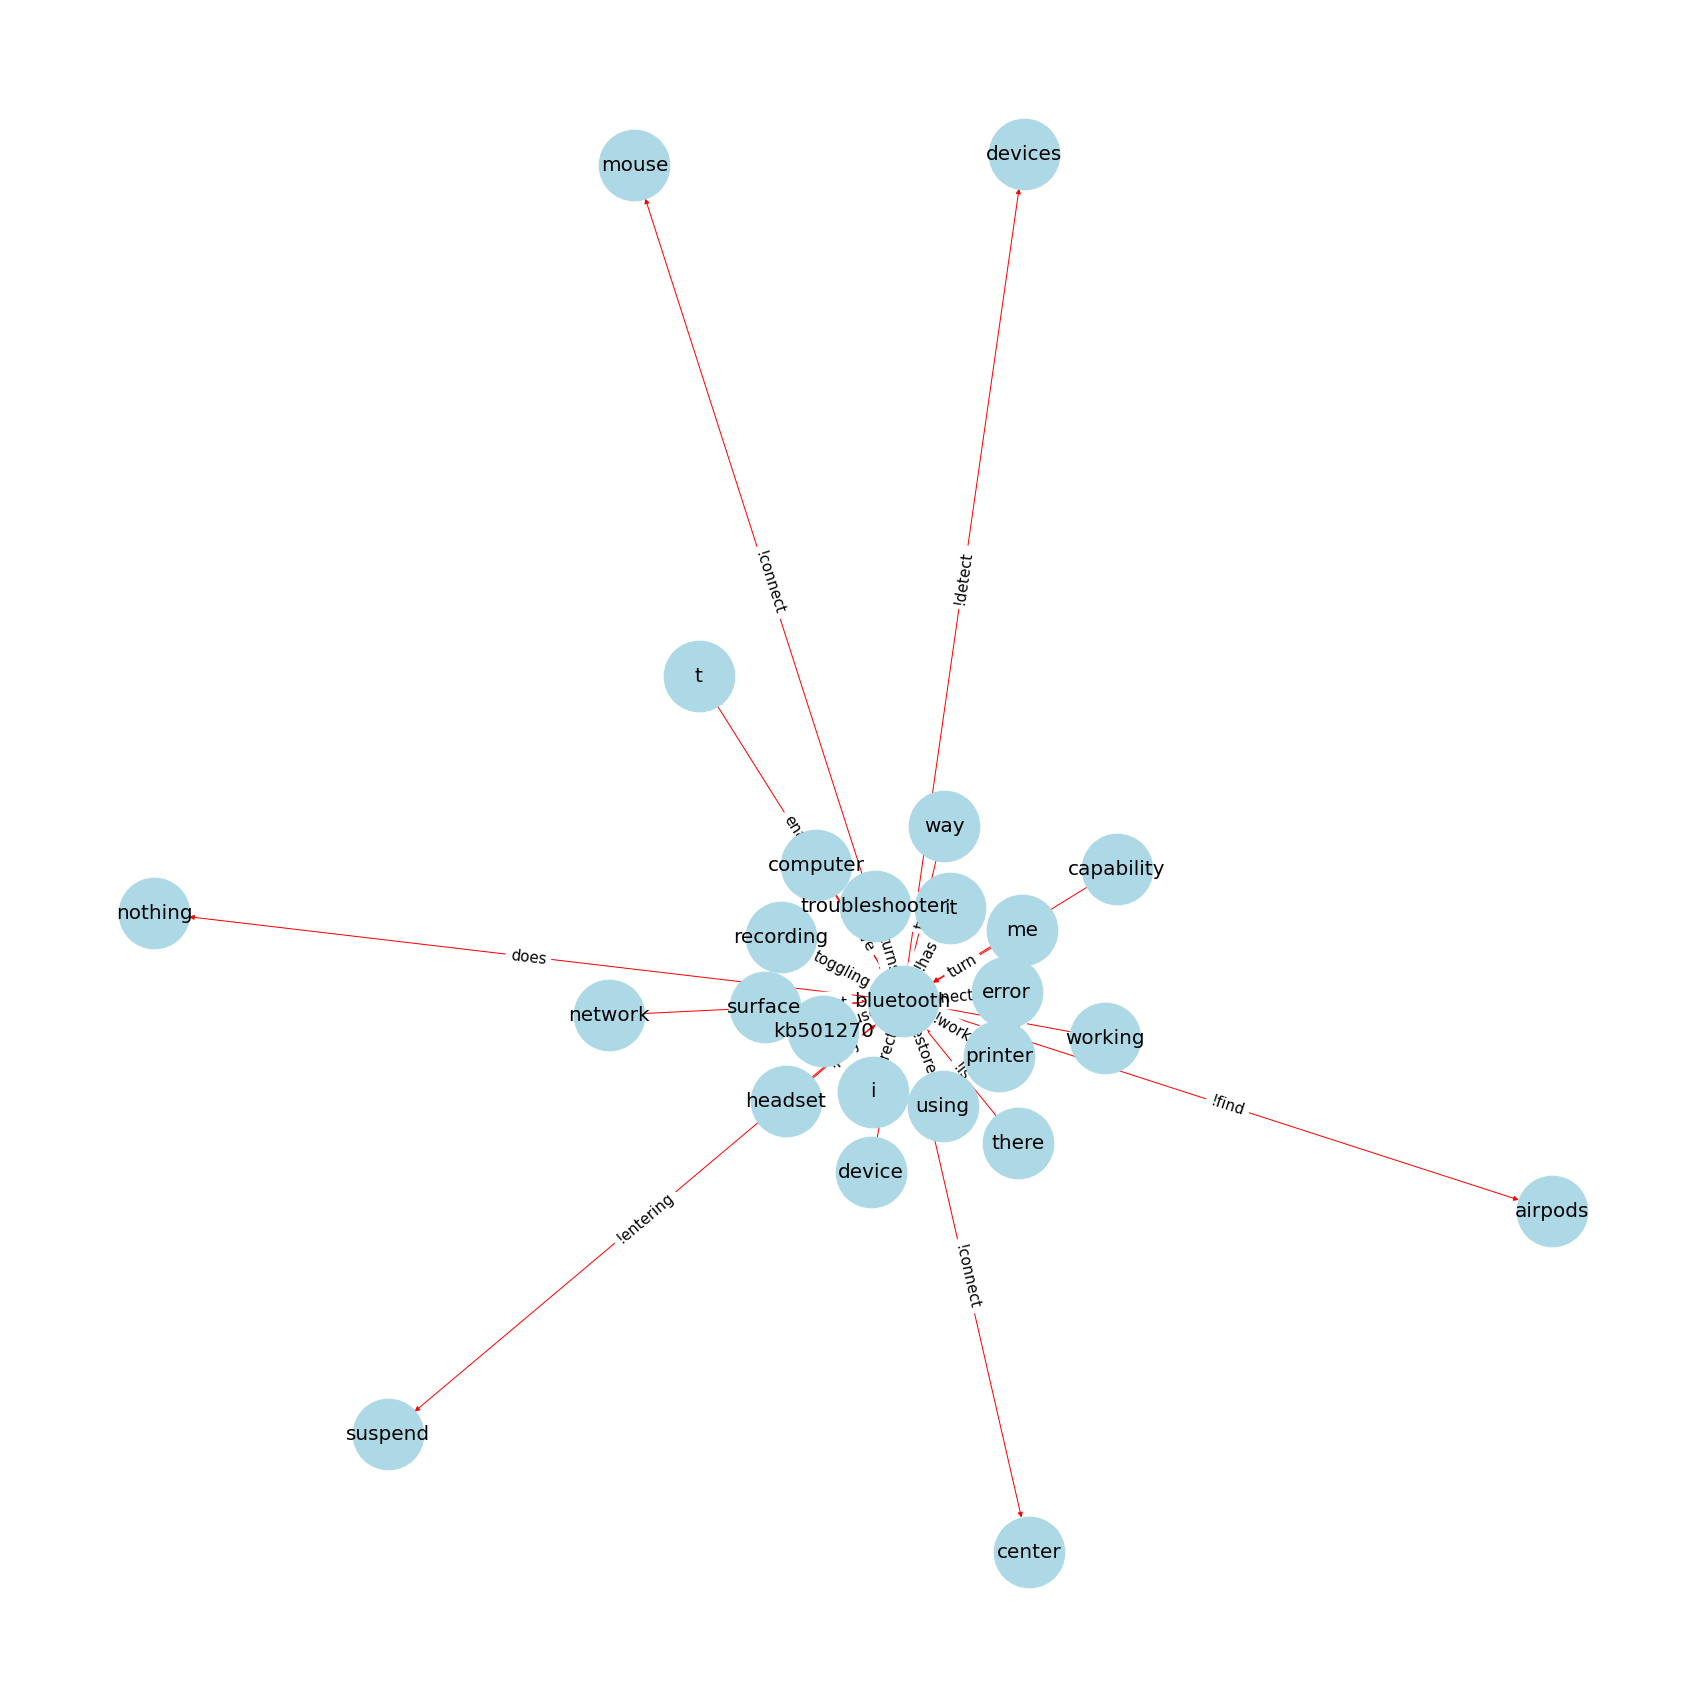

In [6]:
get_subsystem_kg ('bluetooth', final_nodes)

[('battery', 'appears', 'poor'), ('it', '!charge', 'battery'), ('it', 'display', 'battery'), ('it', 'charge', 'battery'), ('battery', 'has', 'charge'), ('way', 'prevent', 'battery'), ('battery', 'runs', '%'), ('battery', 'reduced', 'performance'), ('it', 'went', 'battery'), ('it', 'indicates', 'battery'), ('windows', 'uses', 'battery'), ('i', 'charged', 'battery'), ('i', '!have', 'battery'), ('it', '!detect', 'battery'), ('there', '!is', 'battery'), ('there', '!is', 'battery'), ('i', '!see', 'battery'), ('restarting', '!show', 'battery'), ('battery', '!type', '100'), ('battery', '!type', 'audio'), ('battery', '!charging', 'level'), ('battery', '!exceed', '%'), ('you', 'replaced', 'battery'), ('windows', 'reported', 'battery'), ('option', 'improve', 'battery'), ('option', 'improve', 'battery'), ('option', 'improve', 'battery'), ('battery', '!get', 'charge'), ('battery', 'lasts', 'hours'), ('battery', '!exceeded', '%'), ('you', 'empty', 'battery'), ('battery', '!charged', 'supported'), (

(<networkx.classes.digraph.DiGraph at 0x2d2b4e1f8e0>,
 {('battery', 'poor'): 'appears',
  ('battery', 'charge'): '!get',
  ('battery', '%'): 'shows',
  ('battery', 'performance'): 'reduced',
  ('battery', '100'): '!type',
  ('battery', 'audio'): '!type',
  ('battery', 'level'): '!charging',
  ('battery', 'hours'): 'lasts',
  ('battery', 'supported'): '!charged',
  ('battery', 'battery'): '!set',
  ('battery', 'stops'): 'charging',
  ('battery', 'programs'): 'shuts',
  ('battery', 'icon'): 'charging',
  ('battery', 'issue'): 'have',
  ('battery', 'displays'): '!charge',
  ('battery', 'chart'): '!charge',
  ('battery', 'laptop'): 'replacing',
  ('battery', 'it'): 'sending',
  ('battery', 'product'): 'receiving',
  ('it', 'battery'): 'has',
  ('way', 'battery'): 'prevent',
  ('%', 'battery'): 'charged',
  ('windows', 'battery'): '!detect',
  ('i', 'battery'): 'lose',
  ('there', 'battery'): 'is',
  ('restarting', 'battery'): '!show',
  ('you', 'battery'): 'empty',
  ('option', 'battery'):

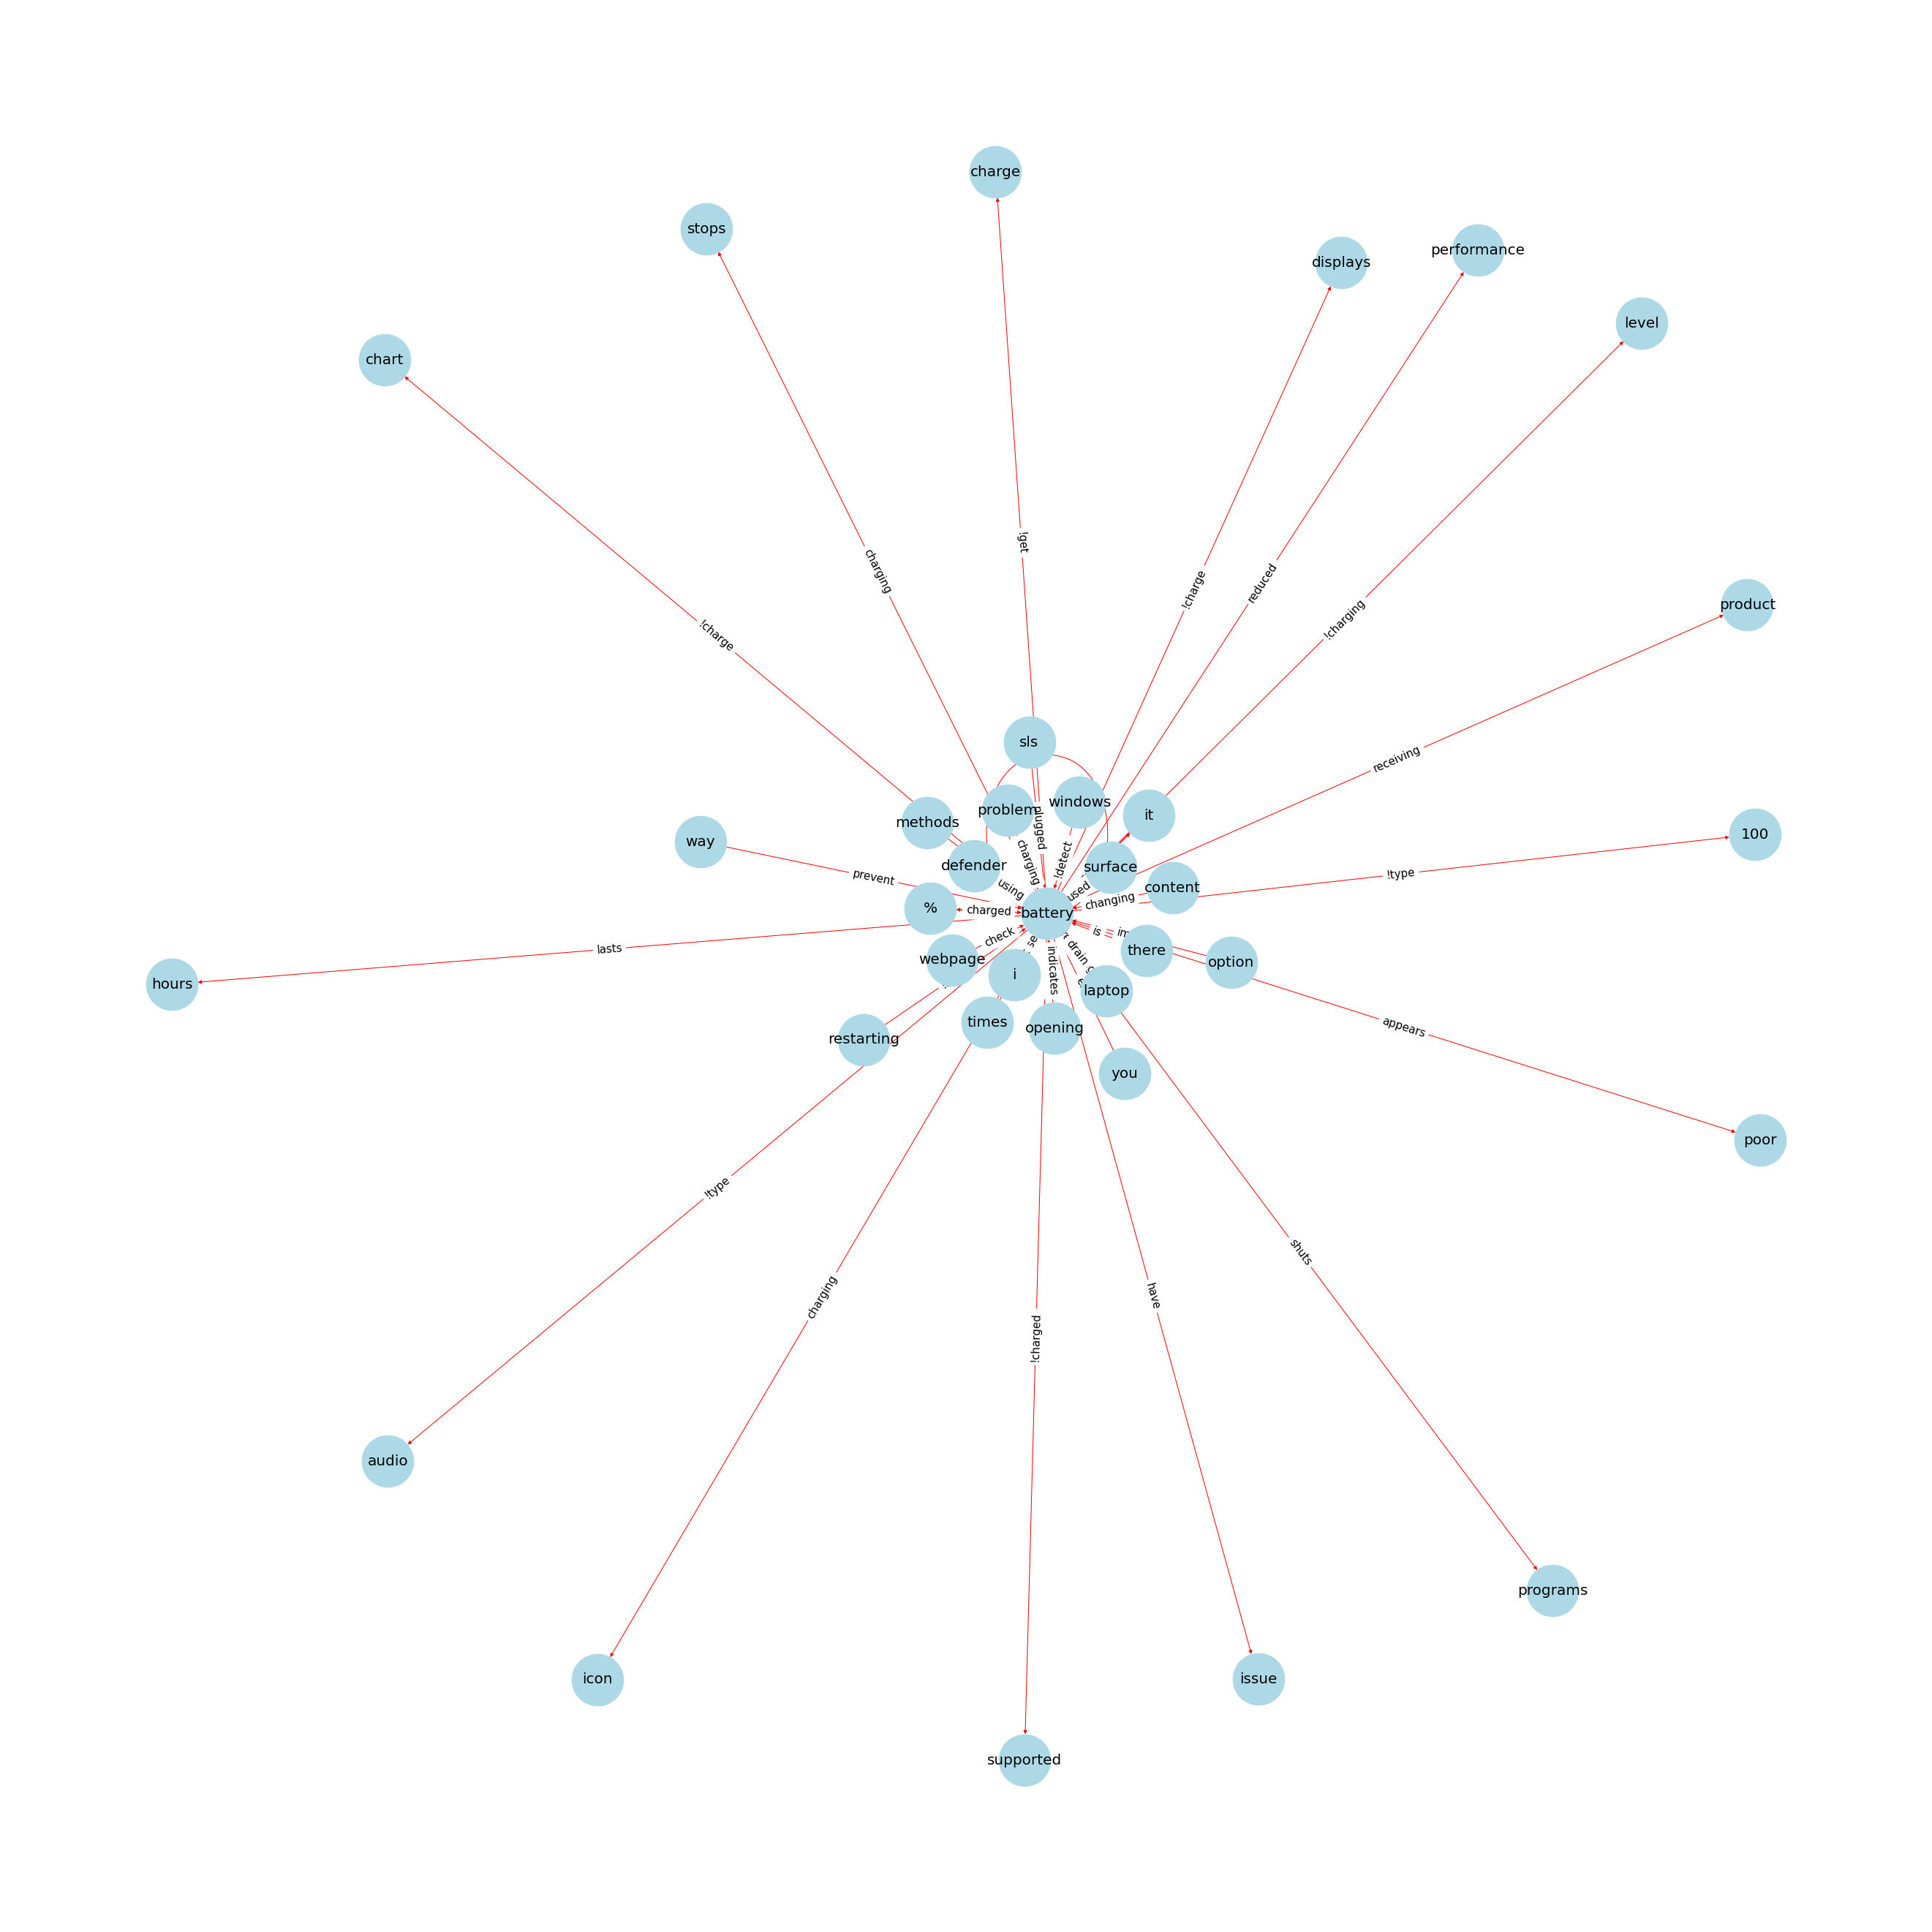

In [7]:
get_subsystem_kg ('battery', final_nodes)

[('mouse', 'stop', 'mouse'), ('mouse', 'stop', 'keyboard'), ('nothing', 'stop', 'it'), ('me', 'stop', 'recording'), ('you', 'stop', 'it'), ('kmode_exception_not_handled', 'stop', 'code'), ('manager', 'using', 'stop'), ('keyboard', 'stop', 'problem'), ('you', 'stop', 'ribbon'), ('way', 'stop', 'this'), ('locking', 'stop', 'cam'), ('locking', 'stop', 'mic'), ('way', 'stop', 'it'), ('pen', '!charge', 'stop')]


(<networkx.classes.digraph.DiGraph at 0x2d2b4f62400>,
 {('mouse', 'mouse'): 'stop',
  ('mouse', 'keyboard'): 'stop',
  ('keyboard', 'problem'): 'stop',
  ('nothing', 'it'): 'stop',
  ('me', 'recording'): 'stop',
  ('you', 'it'): 'stop',
  ('you', 'ribbon'): 'stop',
  ('kmode_exception_not_handled', 'code'): 'stop',
  ('manager', 'stop'): 'using',
  ('way', 'this'): 'stop',
  ('way', 'it'): 'stop',
  ('locking', 'cam'): 'stop',
  ('locking', 'mic'): 'stop',
  ('pen', 'stop'): '!charge'})

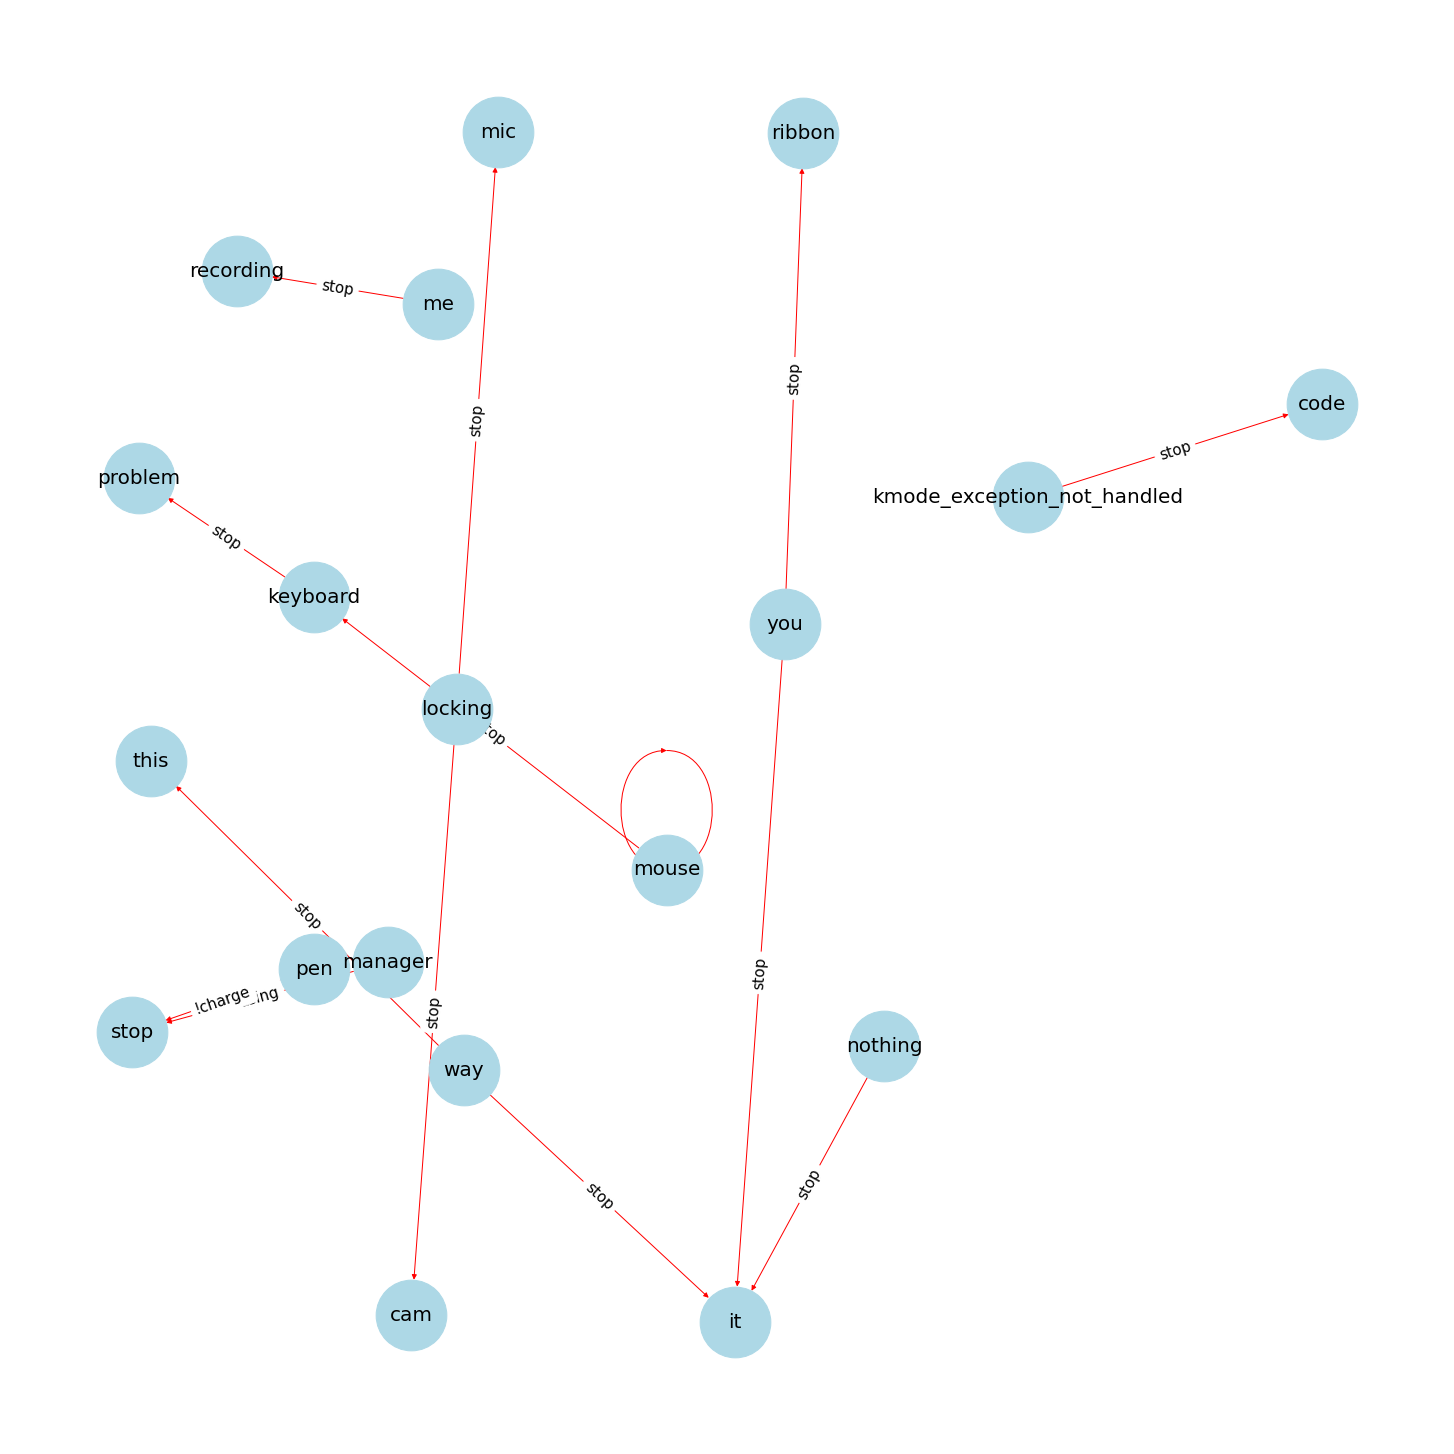

In [8]:
get_subsystem_kg ('stop', final_nodes)

In [10]:
def get_sentiment_score(filename):
    sia_score = []
    file_name = filename
    sentences = load_text('data/' + file_name + '.csv')
    sia = SentimentIntensityAnalyzer()
    for sentence in sentences:
        sia_score.append([sentence, sia.polarity_scores(sentence)])
    print(sia_score)

In [15]:
get_sentiment_score('fulldataUIF')

[['ï»¿"Added the function of inserting PDFs | Currently I can only insert a pdf through the printout, and during the handwriting input process, tapping the screen will bring up the keyboard, and it is recommended to introduce the option to turn off typing text when typing in handwriting.', {'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.2023}], ['Thank you."', {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}], ['AUDIO OUTPUT NOT WORKING | there is a cross on the audio symbol on my screen\nBATTERY level indicator is missing | How stupid and customer-unfriendly you have to be in order to no longer let the battery status be adjusted in the taskbar.', {'neg': 0.17, 'neu': 0.83, 'pos': 0.0, 'compound': -0.7783}], ["You're just stupid!!!!!!!!!!", {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], ['Battery life dropped after upgrading to Win11 |\n"Broken touch, not the problem of the pen |"\nCall ended without anyone coming onto the line.', {'neg': 0.113, 'neu': 0.804